In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the dataset

path = '/kaggle/input/heart-disease-dataset/heart.csv'
df = pd.read_csv(path)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# shape of the data

df.shape

(1025, 14)

In [5]:
# check for missing values in the data

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- There are no missing values in the data

In [6]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


- All columns are numerical so no encoding is required.

In [7]:
# distribution of the target column

df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

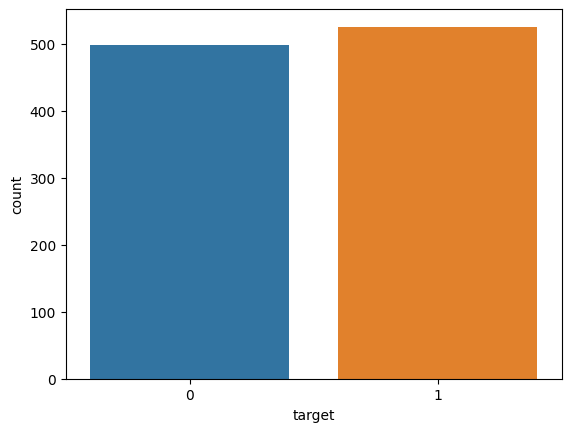

In [8]:
# plot the distribution of the target

sns.countplot(x='target',data=df)
plt.show()

The distribution of the target column is almost uniform and it is a balanced dataset.

## Feature Transformations 

In [9]:
# split the df into X and y
X = df.drop(columns=['target'])
y =  df['target']

In [10]:
# unique values in cat columns

cat_cols = []

for col in X.columns:
    if (X[col].nunique()) < 10:
        cat_cols.append(col)
    else:
        continue
        
cat_cols

for col in cat_cols:
    print(f'{col} --> {X[col].unique()}')

sex --> [1 0]
cp --> [0 1 2 3]
fbs --> [0 1]
restecg --> [1 0 2]
exang --> [0 1]
slope --> [2 0 1]
ca --> [2 0 1 3 4]
thal --> [3 2 1 0]


In [11]:
# check the normality of continuous columns

num_cols = [cols for cols in X.columns if cols not in cat_cols]
num_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

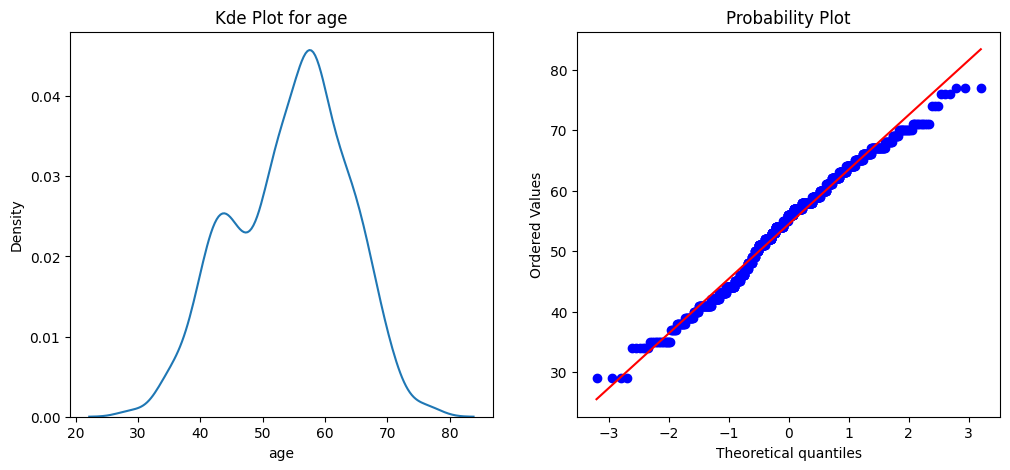

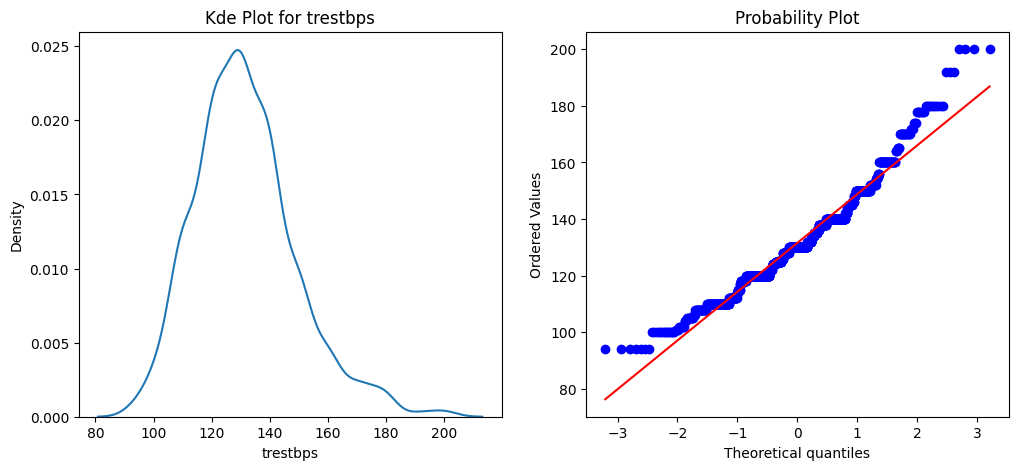

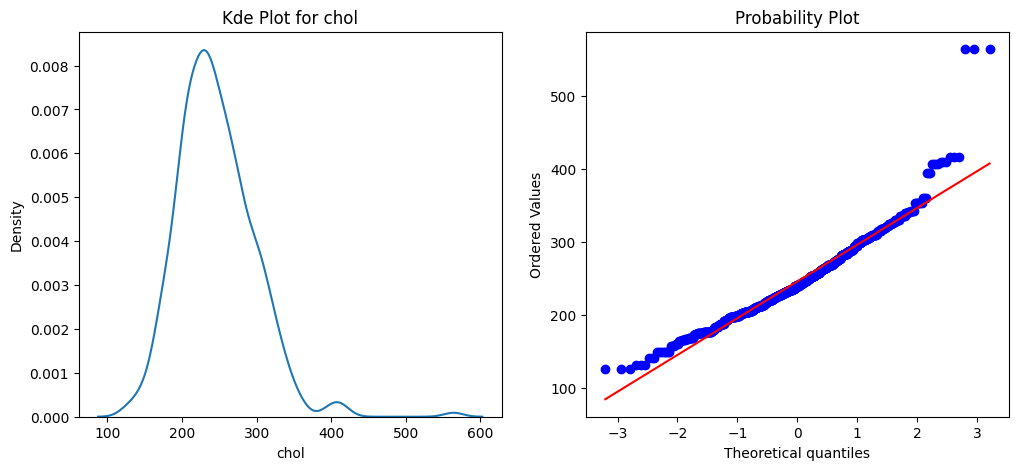

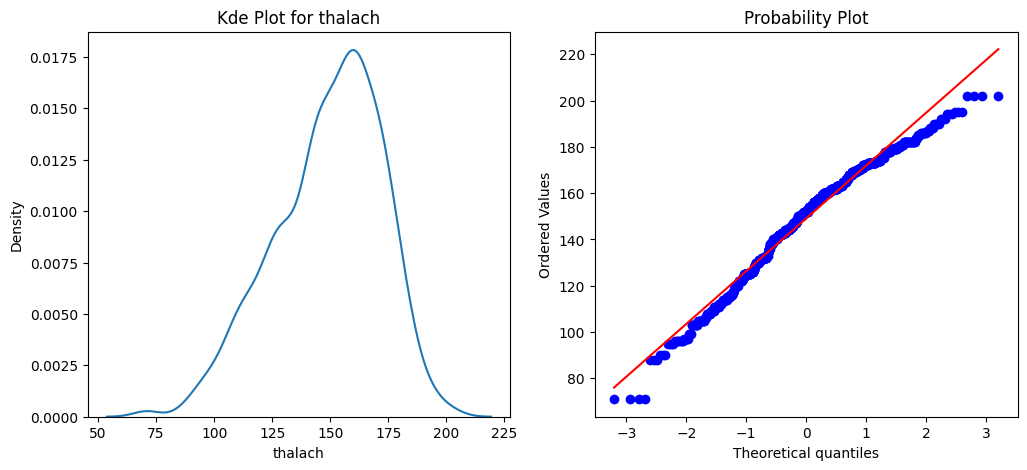

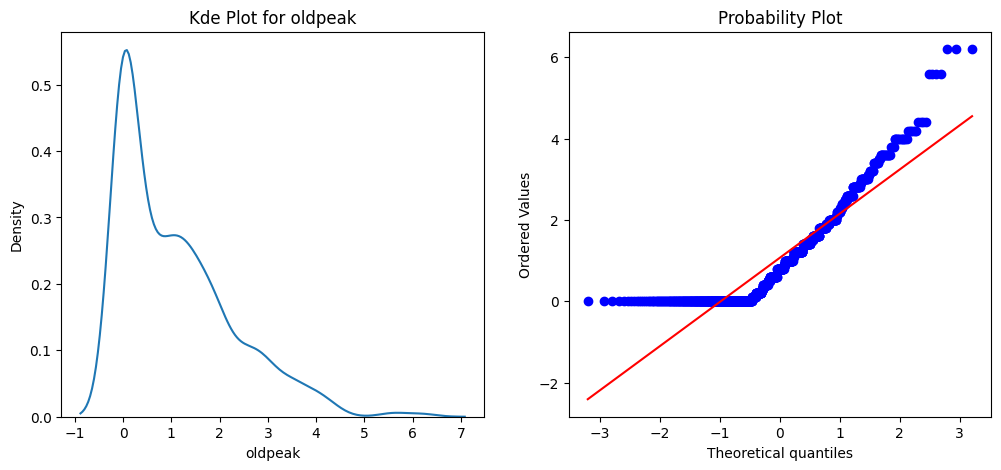

In [12]:
from scipy.stats import probplot

for num in num_cols:

    fig,ax = plt.subplots(1,2,figsize=(12,5))

    # plot the kde plot
    ax[0] = sns.kdeplot(X[num],ax=ax[0])
    ax[0].set_title(f'Kde Plot for {num}')
    
    #plot the probplot
    ax[1] = probplot(X[num],dist='norm',plot=ax[1])

In [13]:
# do train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=54)

print('The shape of X_train is',X_train.shape)
print('The shape of X_test is',X_test.shape)

The shape of X_train is (820, 13)
The shape of X_test is (205, 13)


In [14]:
# transform the columns

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson',standardize=True).set_output(transform='pandas')

# fit transform the X_train
X_train_trans = pt.fit_transform(X_train)

# transform the X_test
X_test_trans = pt.transform(X_test)

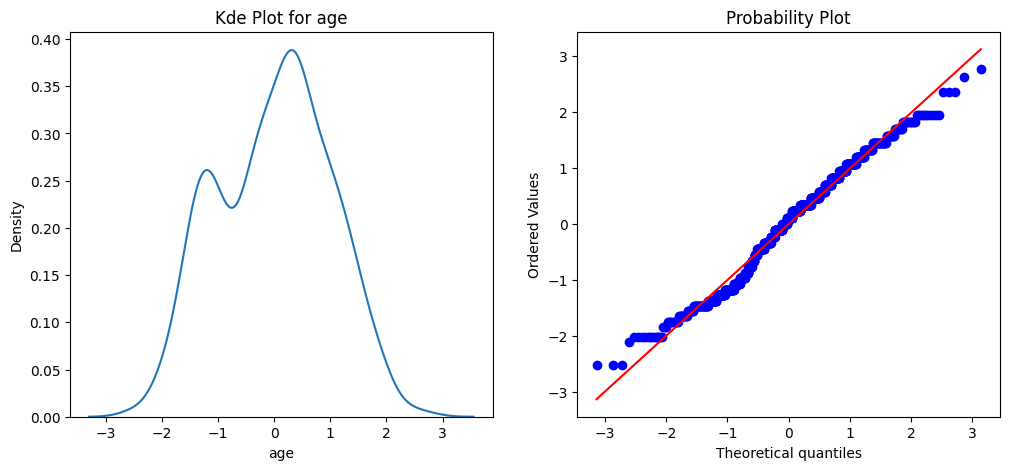

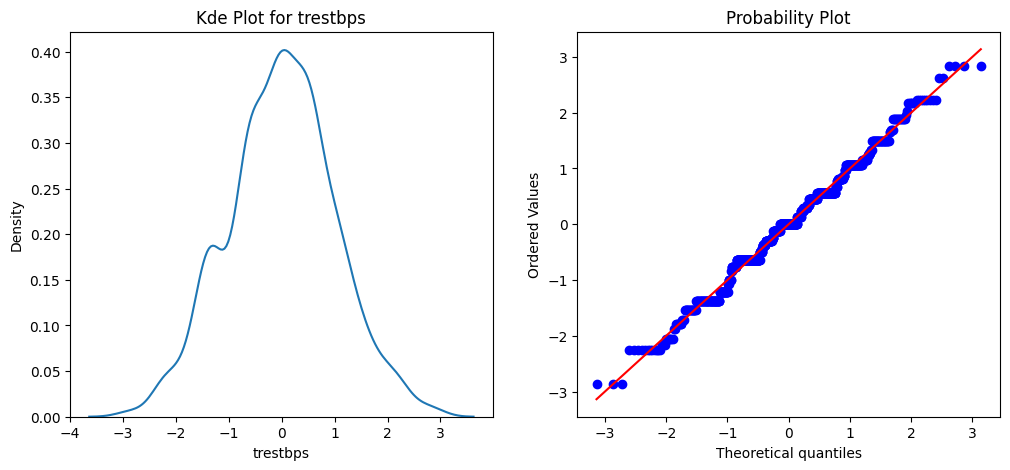

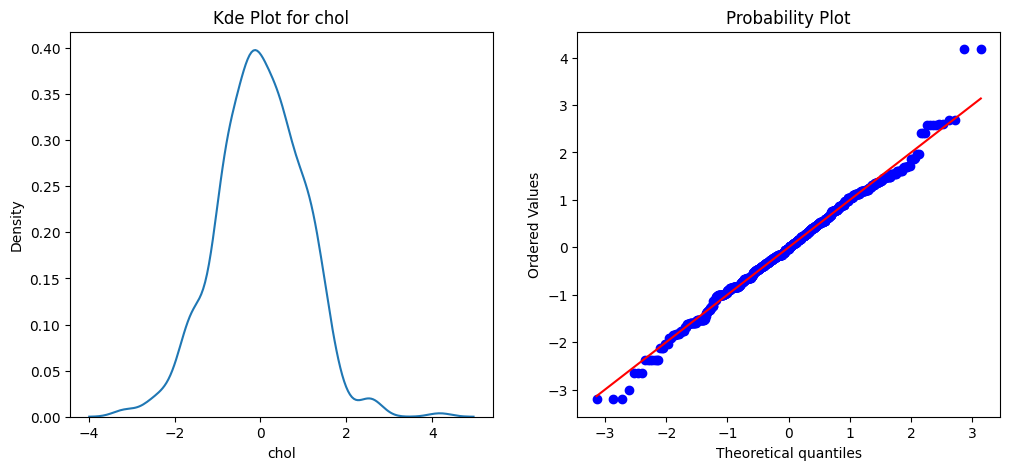

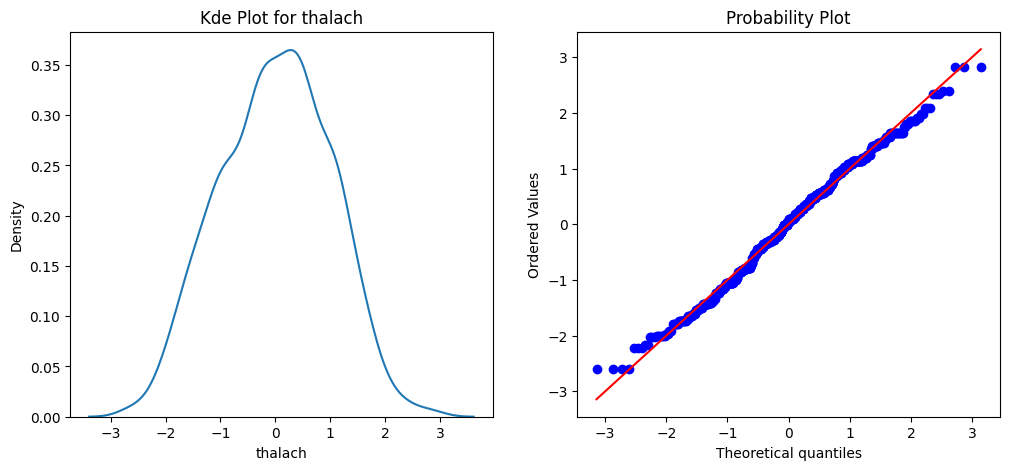

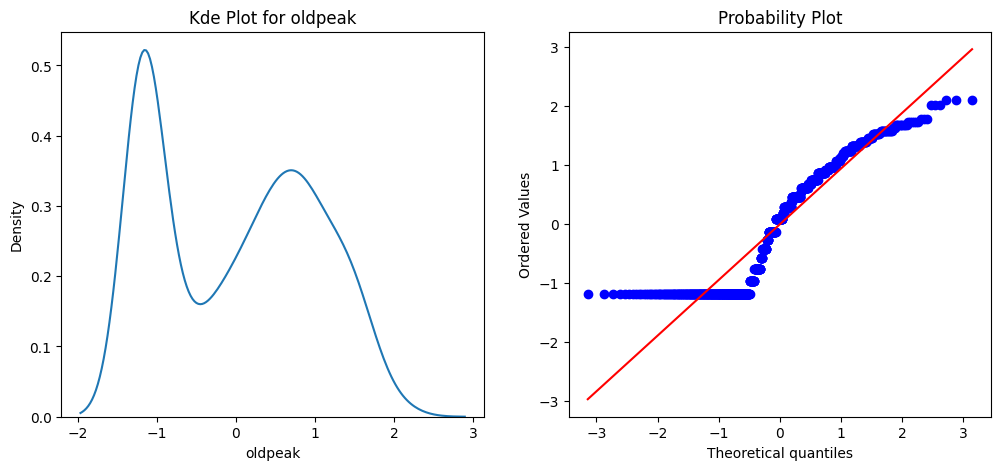

In [15]:
# normaility in data after transformation
for num in num_cols:

    fig,ax = plt.subplots(1,2,figsize=(12,5))

    # plot the kde plot
    ax[0] = sns.kdeplot(X_train_trans[num],ax=ax[0])
    ax[0].set_title(f'Kde Plot for {num}')
    
    #plot the probplot
    ax[1] = probplot(X_train_trans[num],dist='norm',plot=ax[1])

**The data slso gets scaled after transformation so no scaling is required.**

In [16]:
X_train_trans.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
368,0.348442,0.664172,1.097989,-1.795874,-0.033161,-0.424094,-0.993356,0.178893,1.392504,-0.138616,-0.669304,-0.872706,1.151916
363,-0.220292,0.664172,1.097989,0.007089,0.088449,2.357965,-0.993356,1.133753,-0.718131,-1.183805,1.049379,1.531397,-0.602763
583,-1.266381,0.664172,-0.976704,-0.633594,-1.532133,-0.424094,-0.993356,-1.231163,1.392504,1.206383,-0.669304,-0.872706,1.151916
587,0.465697,0.664172,-0.976704,1.654338,-1.560011,2.357965,-0.993356,-2.163305,-0.718131,0.290420,-0.669304,1.293680,-1.910200
1014,-1.167469,-1.505634,1.097989,-1.540477,-2.650519,-0.424094,0.966333,1.241303,-0.718131,-0.138616,-0.669304,-0.872706,-0.602763


## Model Training

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.model_selection import cross_val_score

### Accuracy_score

<div style="background-color:#F0B27A ; padding: 20px;">
    <span style="font-size: 18px;">
Accuracy score is a commonly used metric in machine learning and statistics to measure the performance of a classification model. It is the ratio of correctly predicted instances (or observations) to the total number of instances in the dataset.

In a binary classification problem, where there are two classes (e.g., "positive" and "negative"), accuracy score is calculated as:

Accuracy = (Number of correctly predicted instances) / (Total number of instances)

For example, if you have a dataset with 100 instances, and your model correctly predicts 85 instances, then the accuracy score would be:

Accuracy = 85 / 100 = 0.85 or 85%


$$Accuracy = \dfrac{(TP + TN)}{(TP + TN + FP + FN)}$$
    </span>
</div>

In [19]:
from sklearn.metrics import accuracy_score

# fit the logistic regression model

log_reg = LogisticRegression()

log_reg.fit(X_train_trans,y_train)

# predict the X_test
y_pred = log_reg.predict(X_test_trans)

# calculate the accuracy score
score = accuracy_score(y_test,y_pred)
print('The accuracy score is ',score)

# perform cross validation with cv of 5

cross_val = cross_val_score(log_reg,X_train_trans,y_train,cv=5,
                           scoring='accuracy',n_jobs=-1)

print('The mean acuracy score after cross validation is',np.mean(cross_val))

The accuracy score is  0.8731707317073171
The mean acuracy score after cross validation is 0.8426829268292684


In [20]:
# fit the knn model

knn = KNeighborsClassifier()

knn.fit(X_train_trans,y_train)

# predict the X_test
y_pred = knn.predict(X_test_trans)

# calculate the accuracy score
score = accuracy_score(y_test,y_pred)
print('The accuracy score is ',score)

# perform cross validation with cv of 5

cross_val = cross_val_score(knn,X_train_trans,y_train,cv=5,
                           scoring='accuracy',n_jobs=-1)

print('The mean acuracy score after cross validation is',np.mean(cross_val))

The accuracy score is  0.8439024390243902
The mean acuracy score after cross validation is 0.8365853658536585


In [21]:
# find the optimum k value

all_scores = []

for k in range(3,32,2):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_trans,y_train)

    # predict the X_test
    y_pred = knn.predict(X_test_trans)

    # perform cross validation with cv of 5

    cross_val = cross_val_score(knn,X_train_trans,y_train,cv=5,
                               scoring='accuracy',n_jobs=-1)

    all_scores.append(cross_val.mean())

In [22]:
# create a dataframe for all the scores

data = {
    'k_value':list(range(3,32,2)),
    'scores':all_scores
}

scores_df = pd.DataFrame(data)
scores_df.sort_values(by='scores',ascending=False)

,k_value,scores
0,3,0.913415
3,9,0.869512
4,11,0.864634
6,15,0.862195
5,13,0.860976
2,7,0.858537
7,17,0.848780
11,25,0.840244
8,19,0.837805
1,5,0.836585


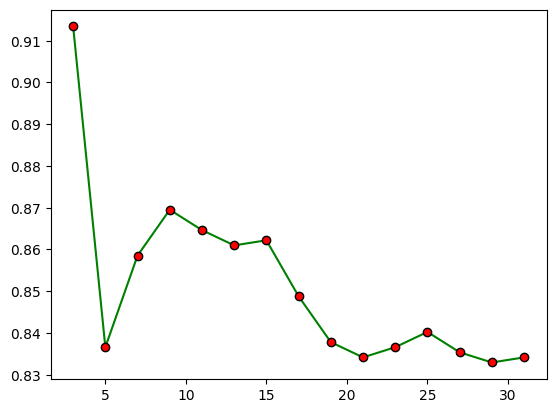

In [23]:
# plot the scores on a graph

plt.plot(scores_df['k_value'],scores_df['scores'],marker='o',
        mec='k',mfc='red',color='green')
plt.show()

In [24]:
# fit the knn model

dt = DecisionTreeClassifier()

dt.fit(X_train_trans,y_train)

# predict the X_test
y_pred = dt.predict(X_test_trans)

# calculate the accuracy score
score = accuracy_score(y_test,y_pred)
print('The accuracy score is ',score)

# perform cross validation with cv of 5

cross_val = cross_val_score(dt,X_train_trans,y_train,cv=5,
                           scoring='accuracy',n_jobs=-1)

print('The mean acuracy score after cross validation is',np.mean(cross_val))

The accuracy score is  1.0
The mean acuracy score after cross validation is 0.9804878048780488


## Confusion Matrix

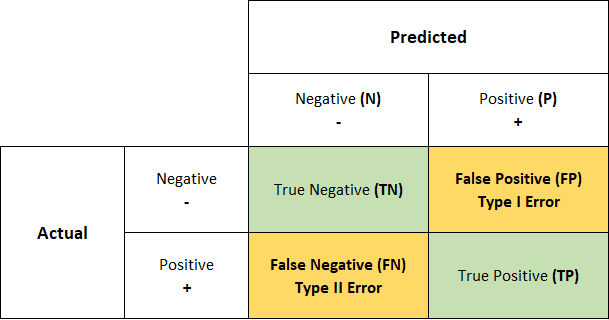

<div style="background-color:#F0B27A ; padding: 20px;">
    <span style="font-size: 18px;">

Confusion matrix is a tabular representation that shows the performance of a classification model by comparing the predicted labels with the actual labels. It provides a detailed breakdown of the model's predictions and their alignment with the ground truth.

A confusion matrix is typically a square matrix with rows and columns representing the different classes or labels in the classification problem. For a binary classification problem, the confusion matrix has two rows and two columns.

|         | Predicted Positive | Predicted Negative |
|---------|-------------------|-------------------|
| Actual Positive |       True Positive      |      False Negative     |
| Actual Negative |      False Positive      |      True Negative      |


Let's break down the elements of the confusion matrix:

- True Positive (TP): The model correctly predicted the positive class.
- False Positive (FP): The model incorrectly predicted the positive class when the actual class was negative.
- False Negative (FN): The model incorrectly predicted the negative class when the actual class was positive.
- True Negative (TN): The model correctly predicted the negative class.
        
    </span>
</div>

In [25]:
# generate the confusion matrix for knn model

# fit the knn model

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_trans,y_train)

# predict the X_test
y_pred = knn.predict(X_test_trans)

# calculate the accuracy score
score = accuracy_score(y_test,y_pred)
print('The accuracy score is ',score)

# perform cross validation with cv of 5

cross_val = cross_val_score(knn,X_train_trans,y_train,cv=5,
                           scoring='accuracy',n_jobs=-1)

print('The mean acuracy score after cross validation is',np.mean(cross_val))

The accuracy score is  0.9609756097560975
The mean acuracy score after cross validation is 0.9134146341463415


In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred,labels=[0,1])
cm

array([[ 91,   0],
       [  8, 106]])

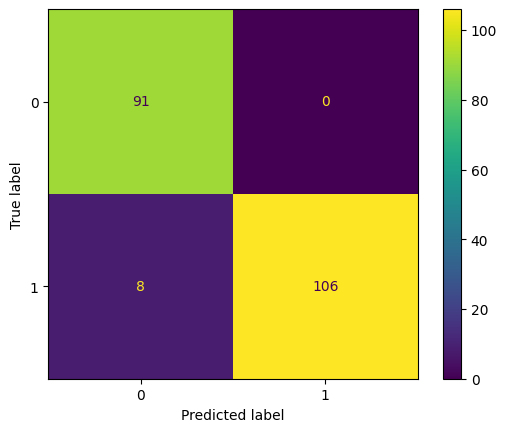

In [27]:
# plot the confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

## Plot Decision boundary

**To plot the data on the 2D graph we have to perform dimensionality reduction of the data**

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).set_output(transform='pandas')

# transform the train data
X_train_pca = pca.fit_transform(X_train_trans)

# transform the test data
X_test_pca = pca.transform(X_test_trans)

# compare the shape before and after pca
print('The shape of X_train before transformation',X_train_trans.shape)
print('The shape of X_train after transformation',X_train_pca.shape)
print()
print('The shape of X_test before transformation',X_test_trans.shape)
print('The shape of X_test after transformation',X_test_pca.shape)

The shape of X_train before transformation (820, 13)
The shape of X_train after transformation (820, 2)

The shape of X_test before transformation (205, 13)
The shape of X_test after transformation (205, 2)


In [29]:
X_train_pca.head()

,pca0,pca1
368,0.302144,-1.190902
363,-1.421256,1.625258
583,1.627767,-2.586267
587,1.722880,1.302231
1014,-2.449533,-1.398529


In [30]:
# fit the knn model

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_pca,y_train)

# predict the X_test
y_pred = knn.predict(X_test_pca)

# calculate the accuracy score
score = accuracy_score(y_test,y_pred)
print('The accuracy score is ',score)

# perform cross validation with cv of 5

cross_val = cross_val_score(knn,X_train_pca,y_train,cv=5,
                           scoring='accuracy',n_jobs=-1)

print('The mean acuracy score after cross validation is',np.mean(cross_val))

The accuracy score is  0.9219512195121952
The mean acuracy score after cross validation is 0.9073170731707318


In [31]:
# create a numpy meshgrid

x = np.arange(start=X_train_pca.iloc[:,0].min() - 1,
             stop=X_train_pca.iloc[:,0].max() + 1,
             step=0.01)
y = np.arange(start=X_train_pca.iloc[:,1].min() - 1,
             stop=X_train_pca.iloc[:,1].max() + 1,
             step=0.01)

print('The shape of x is',x.shape)
print('The shape of y is',y.shape)

The shape of x is (971,)
The shape of y is (921,)


In [32]:
# create a meshgrid

XX,YY = np.meshgrid(x,y)

print('The shape of XX is',XX.shape)
print('The shape of YY is',YY.shape)

The shape of XX is (921, 971)
The shape of YY is (921, 971)


In [33]:
# create a prediction array

arr = np.array([XX.ravel(),YY.ravel()])
print('The shape of the array is',arr.shape)

The shape of the array is (2, 894291)


In [34]:
# transpose the array
Z = arr.T

print('The shape of the prediction array is',Z.shape)
Z

The shape of the prediction array is (894291, 2)


array([[-4.75695091, -4.19900722],
       [-4.74695091, -4.19900722],
       [-4.73695091, -4.19900722],
       ...,
       [ 4.92304909,  5.00099278],
       [ 4.93304909,  5.00099278],
       [ 4.94304909,  5.00099278]])

In [35]:
# predict the function

Z = knn.predict(Z)
print('The shape of the plotting function is',Z.shape)
Z


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The shape of the plotting function is (894291,)


array([1, 1, 1, ..., 0, 0, 0])

In [36]:
# reshape the plotting function

Z = Z.reshape(XX.shape)

print('The shape of the plotting function is',Z.shape)
Z

The shape of the plotting function is (921, 971)


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

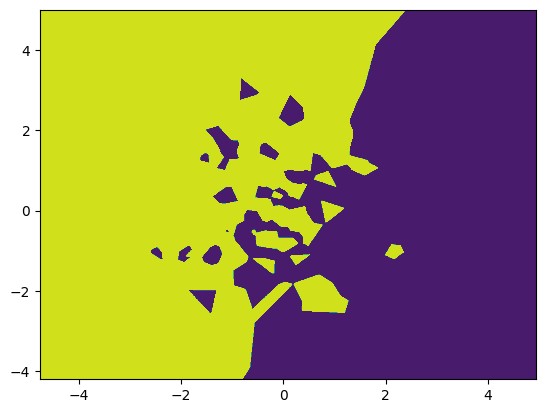

In [37]:
# make a contour plot to show decision boundaries

plt.contourf(XX,YY,Z)
plt.show()

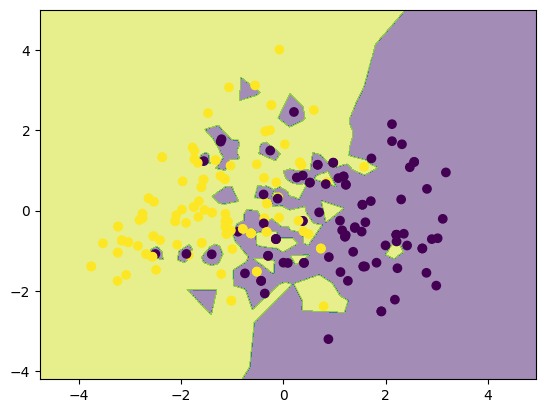

In [38]:
# plot the test points on the contour plot

plt.contourf(XX,YY,Z,alpha=0.5)
plt.scatter(X_test_pca.iloc[:,0],X_test_pca.iloc[:,1],c=y_test)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

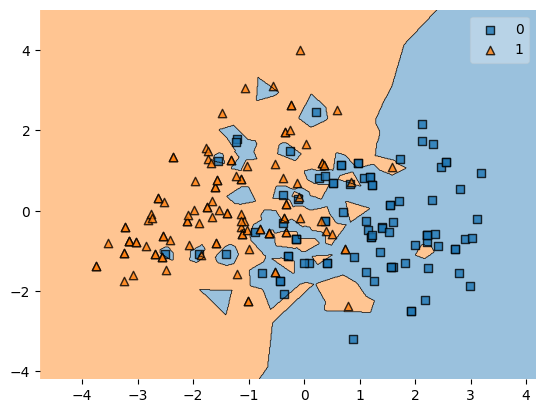

In [39]:
# plot the decision boundary using mlxtend

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test_pca.values,y_test.values,knn)

- The `n_neighbors` value of 3 shows signs of overfitting.

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


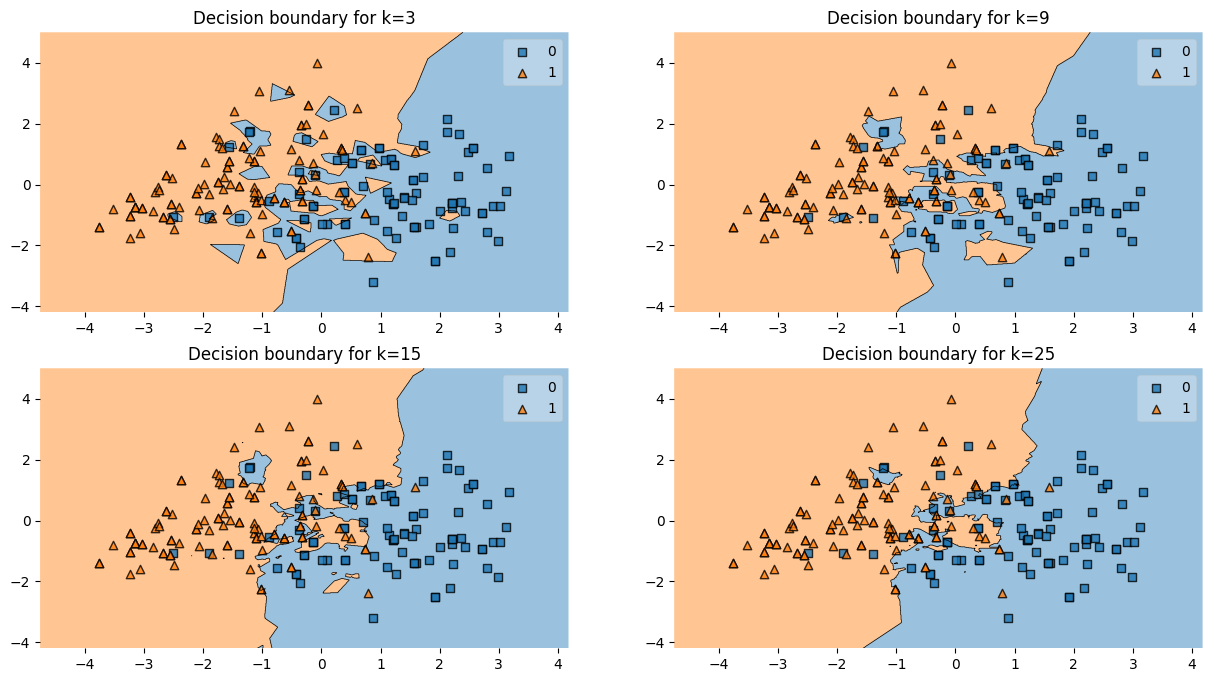

In [40]:
# plot decision boundaries for diff values of k

k_vals = [[3,9],[15,25]]

# create subplots
fig,ax = plt.subplots(2,2,figsize=(15,8))

for i in range(2):
    for j in range(2):
        knn = KNeighborsClassifier(n_neighbors=k_vals[i][j])

        knn.fit(X_train_pca,y_train)

        plot_decision_regions(X_test_pca.values,y_test.values,knn,ax=ax[i][j])
        ax[i][j].set_title(f'Decision boundary for k={k_vals[i][j]}')

### Precision

<div style="background-color:#F0B27A ; padding: 20px;">

<span style="font-size: 18px;">
    
In classification tasks, precision is a metric that measures the accuracy of the positive predictions made by a model. It calculates the proportion of correctly predicted positive instances out of the total instances predicted as positive.

Precision can be defined mathematically as:

$$Precision = \dfrac {TP}{(TP + FP)}$$

Where:

- TP (True Positives) is the number of instances that are actually positive and are correctly predicted as positive by the model.
- FP (False Positives) is the number of instances that are actually negative but are incorrectly predicted as positive by the model.

In simpler terms, precision answers the question: "Out of all the instances predicted as positive, how many were actually positive?"

A high precision score indicates that the model has a low number of false positives, meaning it is good at correctly identifying positive instances. On the other hand, a low precision score suggests that the model has a high number of false positives, indicating a higher likelihood of incorrect positive predictions.

Precision is particularly useful when the cost of false positives is high, and it is important to minimize the number of incorrect positive predictions

------
    
Imagine you have a classification model that predicts whether an email is spam or not spam (ham). Precision is a measure of how accurate the model is when it says an email is spam.
    
Precision tells you the proportion of emails predicted as spam that are actually spam. In other words, it answers the question: "Out of all the emails the model says are spam, how many of them are actually spam?"

A high precision score means that when the model identifies an email as spam, it is usually correct. It has a low number of false positives, meaning it doesn't wrongly label non-spam emails as spam very often.

On the other hand, a low precision score means that the model tends to identify non-spam emails as spam more frequently. It has a higher chance of making false positive errors.
    
</span>
</div>

In [41]:
# understand precision with example

data = {
    'X1': [1.2, 3.4, 2.1, 5.6, 4.2, 0.9, 2.8, 3.1, 1.5, 2.7, 4.9, 3.8, 1.7, 2.3, 4.5, 3.6, 2.2, 1.9, 5.1, 3.5],
    'X2': [2.5, 1.1, 3.8, 2.2, 4.0, 1.9, 3.6, 2.3, 1.4, 3.2, 4.7, 2.9, 1.6, 3.5, 2.8, 4.3, 1.8, 3.9, 2.0, 4.4],
    'Y': [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1],
    'Y_pred': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1]
}

df_temp = pd.DataFrame(data)

df_temp

,X1,X2,Y,Y_pred
0,1.2,2.5,0,1
1,3.4,1.1,1,0
2,2.1,3.8,1,1
3,5.6,2.2,0,1
4,4.2,4.0,1,0
5,0.9,1.9,0,1
6,2.8,3.6,1,0
7,3.1,2.3,1,1
8,1.5,1.4,0,0
9,2.7,3.2,0,1


In [42]:
filt_ypred_positive = df_temp.loc[df_temp['Y_pred'] == 1,['Y','Y_pred']]
false_pos = np.sum(filt_ypred_positive['Y_pred'] - filt_ypred_positive['Y'])
true_pos = len(filt_ypred_positive) - false_pos

print('The true positives in the data are',true_pos)
print('The false positive in the data are',false_pos)

The true positives in the data are 6
The false positive in the data are 5


In [43]:
# calculate the precision score

precision = true_pos / (true_pos+false_pos)
precision

0.5454545454545454

In [44]:
# calculate the precision score using sklearn

from sklearn.metrics import precision_score

precision_score(df_temp['Y'],df_temp['Y_pred'])

0.5454545454545454

In [45]:
# generate the confusion matrix for knn model

# fit the knn model

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_trans,y_train)

# predict the X_test
y_pred = knn.predict(X_test_trans)

# calculate the accuracy score
score = accuracy_score(y_test,y_pred)
print('The accuracy score is ',score)

# perform cross validation with cv of 5

cross_val = cross_val_score(knn,X_train_trans,y_train,cv=5,
                           scoring='accuracy',n_jobs=-1)

print('The mean acuracy score after cross validation is',np.mean(cross_val))

The accuracy score is  0.9609756097560975
The mean acuracy score after cross validation is 0.9134146341463415


In [46]:
# calculate precision score for this data

precision_score(y_test,y_pred)

1.0

In [47]:
cm

tp = cm[1,1]
fp = cm[0,1]
print('The number of true positives based of the confusion matrix are',tp)
print('The number of false positives based of the confusion matrix are',fp)

tp / (tp + fp)

The number of true positives based of the confusion matrix are 106
The number of false positives based of the confusion matrix are 0


1.0

### Recall

<div style="background-color:#F0B27A ; padding: 20px;">

<span style="font-size: 18px;">

Recall is a metric used to evaluate the performance of a classification model, particularly in scenarios where the identification of positive instances is of high importance. It measures the ability of a model to correctly identify all relevant positive instances or, in other words, the proportion of true positive instances that are correctly identified by the model.

$$Recall = \dfrac{True Positives}{(True Positives + False Negatives)}$$

where:

- True Positives (TP) represents the number of instances that are actually positive and are correctly predicted as positive by the model.
- False Negatives (FN) represents the number of instances that are actually positive but are incorrectly predicted as negative by the model.

In essence, recall focuses on minimizing false negatives, as it indicates the proportion of positive instances that were missed by the model. A higher recall value implies that the model has a better ability to identify positive instances correctly.

For example, consider a binary classification problem where we are trying to predict whether an email is spam (positive) or not spam (negative). A high recall value would indicate that the model is successfully identifying most of the spam emails, thus minimizing the false negatives (spam emails classified as not spam)

   </span>
</div>

<div style="background-color:#F0B27A ; padding: 20px;">

<span style="font-size: 18px;">
        
**How is recall different from precision?**
         
Recall measures the ability of a model to correctly identify all relevant positive instances. It calculates the proportion of true positive instances that are correctly identified by the model, while false negatives (positive instances classified as negative) are considered errors.

Precision, on the other hand, measures the ability of a model to correctly identify positive instances among all instances that the model predicted as positive. It calculates the proportion of true positive instances out of all instances predicted as positive by the model, while false positives (negative instances classified as positive) are considered errors.

In simpler terms, recall is about minimizing false negatives, ensuring that all positive instances are detected, while precision is about minimizing false positives, making sure that the positive predictions are accurate.
        
        
</span>
</div>

In [48]:
import numpy as np
import pandas as pd

np.random.seed(42)  # Set a seed for reproducibility

# Generate random values for input columns X1 and X2
X1 = np.random.uniform(low=0.0, high=5.0, size=15)
X2 = np.random.uniform(low=0.0, high=5.0, size=15)

# Generate random binary target labels y
y = np.random.randint(low=0, high=2, size=15)

# Generate random binary predicted labels y_pred
y_pred = np.random.randint(low=0, high=2, size=15)

# Create the DataFrame
data = {'X1': X1, 'X2': X2, 'y': y, 'y_pred': y_pred}
df_temp = pd.DataFrame(data)

df_temp


,X1,X2,y,y_pred
0,1.872701,0.917023,0,1
1,4.753572,1.521211,0,1
2,3.659970,2.623782,0,1
3,2.993292,2.159725,0,0
4,0.780093,1.456146,0,1
5,0.779973,3.059264,1,0
6,0.290418,0.697469,1,1
7,4.330881,1.460723,0,0
8,3.005575,1.831809,1,1
9,3.540363,2.280350,1,0


In [49]:
false_neg = np.sum((df_temp['y'] == 1) & (df_temp['y_pred'] == 0))
true_pos = np.sum((df_temp['y'] == 1) & (df_temp['y_pred'] == 1))

print('The true positives in the data are',true_pos)
print('The false negative in the data are',false_neg)

The true positives in the data are 4
The false negative in the data are 3


In [50]:
# calculate the recall score

recall = true_pos / (true_pos+false_neg)
recall

0.5714285714285714

In [51]:
# calculate the recall using sklearn

from sklearn.metrics import recall_score

recall_score(df_temp['y'],df_temp['y_pred'])

0.5714285714285714

In [52]:
# generate the confusion matrix for knn model

# fit the knn model

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_trans,y_train)

# predict the X_test
y_pred = knn.predict(X_test_trans)

# calculate the accuracy score
score = accuracy_score(y_test,y_pred)
print('The accuracy score is ',score)

# perform cross validation with cv of 5

cross_val = cross_val_score(knn,X_train_trans,y_train,cv=5,
                           scoring='accuracy',n_jobs=-1)

print('The mean acuracy score after cross validation is',np.mean(cross_val))

The accuracy score is  0.9609756097560975
The mean acuracy score after cross validation is 0.9134146341463415


In [53]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 91,   0],
       [  8, 106]])

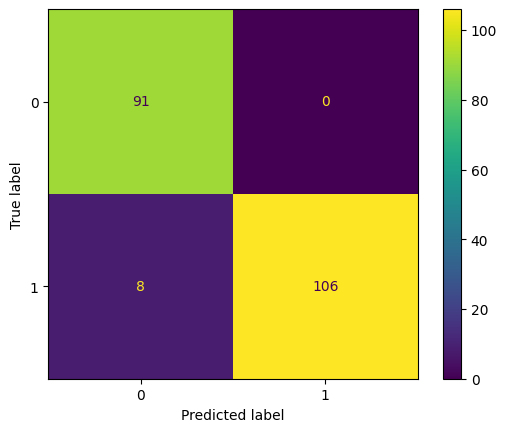

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [55]:
# calculate recall score for this data

recall_score(y_test,y_pred)

0.9298245614035088

In [56]:
tp = cm[1,1]
fn = cm[1,0]
print('The number of true positives based of the confusion matrix are',tp)
print('The number of false negatives based of the confusion matrix are',fn)

tp / (tp + fn)

The number of true positives based of the confusion matrix are 106
The number of false negatives based of the confusion matrix are 8


0.9298245614035088

### F1 Score:

<div style="background-color:#F0B27A ; padding: 20px;">

<span style="font-size: 18px;">

The F1 score is a commonly used evaluation metric in classification tasks that combines precision and recall into a single value. It provides a balance between the two metrics and is particularly useful when dealing with imbalanced datasets where the distribution of classes is uneven.

The F1 score is calculated using the following formula:

$$ F1 Score =2 * \dfrac {(Precision * Recall)}{(Precision + Recall)}$$

where:
- Precision is the proportion of true positive instances out of all instances predicted as positive. It measures the accuracy of positive predictions.
- Recall is the proportion of true positive instances out of all actual positive instances. It measures the completeness or the ability to find all positive instances.

The F1 score ranges from 0 to 1, with 1 being the best possible score indicating perfect precision and recall, and 0 being the worst score indicating poor precision or recall.A score of 0.5 indicates that the model is no better than random guessing.

The F1 score considers both false positives (type I errors) and false negatives (type II errors) and strikes a balance between them. It is a useful metric when you want to consider both precision and recall together and when you don't have a specific preference for one metric over the other.

**The F1 score is a more balanced measure of accuracy than accuracy alone, as it takes into account both precision and recall.**
 
</span>
</div>

<div style="background-color:#F0B27A ; padding: 20px;">

<span style="font-size: 18px;">

**Why is Harmonic mean used instead of Arithmetic mean?**

The F1 score is derived from the harmonic mean of precision and recall. The harmonic mean is a mathematical average that gives more weight to lower values. As a result, the F1 score will always be closer to the lower value between precision and recall.

Let's consider a scenario where precision is 0.8 (80%) and recall is 0.6 (60%). If we calculate the arithmetic mean, the average would be (0.8 + 0.6) / 2 = 0.7 (70%). However, when we calculate the harmonic mean, it becomes 2 * (0.8 * 0.6) / (0.8 + 0.6) = 0.685 (68.5%).

The harmonic mean effectively penalizes extreme values. If either precision or recall is low, the F1 score will be closer to that lower value. This is because the F1 score reflects the trade-off between precision and recall. It rewards models that achieve a balance between the two metrics rather than favoring one over the other.


**The harmonic mean is a measure of central tendency that is more sensitive to outliers than the arithmetic mean. This means that the F1 score will be more influenced by the lower of the precision and recall values**.
    
</span>
</div>

In [57]:
np.random.seed(4)  # Set a seed for reproducibility

# Generate random values for input columns X1 and X2
X1 = np.random.uniform(low=0.0, high=10.0, size=20)
X2 = np.random.uniform(low=0.0, high=10.0, size=20)

# Generate random binary class labels for y and y_pred
y = np.random.randint(low=0, high=2, size=20)
y_pred = np.random.randint(low=0, high=2, size=20)

# Create the DataFrame
data = {'X1': X1, 'X2': X2, 'y': y, 'y_pred': y_pred}
df_temp = pd.DataFrame(data)

df_temp

,X1,X2,y,y_pred
0,9.670298,4.361466,1,1
1,5.472322,9.489773,0,1
2,9.726844,7.863060,0,0
3,7.148160,8.662893,0,1
4,6.977288,1.731654,1,1
5,2.160895,0.749486,1,0
6,9.762745,6.007427,0,1
7,0.062303,1.679722,1,0
8,2.529824,7.333802,1,1
9,4.347915,4.084439,0,0


In [58]:
# calculate the precision score

tp = ((df_temp['y'] == 1) & (df_temp['y_pred'] == 1)).sum()
fp = ((df_temp['y'] == 0) & (df_temp['y_pred'] == 1)).sum()

precision = tp / (tp + fp)

# calculate the recall score
fn = ((df_temp['y'] == 1) & (df_temp['y_pred'] == 0)).sum()

recall = tp / (tp + fn)

# calculate the F1 score
f1 = 2 * (precision*recall) / (precision + recall)

print('The precision score is',np.round(precision,2))
print('The recall score is',np.round(recall,2))
print('The F1 score is',np.round(f1,2))

The precision score is 0.56
The recall score is 0.42
The F1 score is 0.48


In [59]:
# generate a classification report
from sklearn.metrics import classification_report

print(classification_report(df_temp['y'],df_temp['y_pred']))

              precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.56      0.42      0.48        12

    accuracy                           0.45        20
   macro avg       0.46      0.46      0.45        20
weighted avg       0.48      0.45      0.45        20



In [60]:
# generate the confusion matrix for knn model

# fit the knn model

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_trans,y_train)

# predict the X_test
y_pred = knn.predict(X_test_trans)

# calculate the accuracy score
score = accuracy_score(y_test,y_pred)
print('The accuracy score is ',score)

# perform cross validation with cv of 5

cross_val = cross_val_score(knn,X_train_trans,y_train,cv=5,
                           scoring='accuracy',n_jobs=-1)

print('The mean acuracy score after cross validation is',np.mean(cross_val))

The accuracy score is  0.9609756097560975
The mean acuracy score after cross validation is 0.9134146341463415


In [61]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 91,   0],
       [  8, 106]])

In [62]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

0.9636363636363636

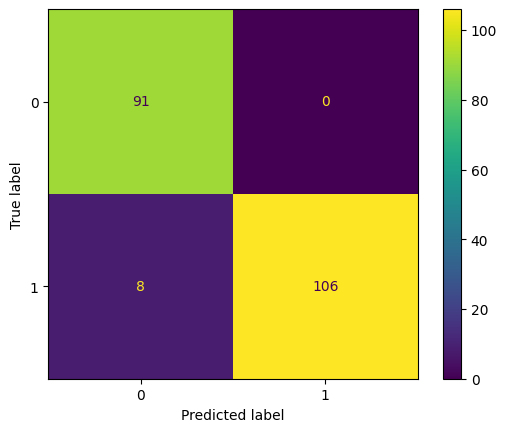

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [64]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

0.9636363636363636

In [65]:
# calculate the f1 score manually from the data

tp = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

# calculate the precision score
precision = tp / (tp + fp)

# calculate the recall score
recall = tp / (tp + fn)

# calculate the F1 score
f1 = 2 * (precision*recall) / (precision + recall)

print('The precision score is',np.round(precision,2))
print('The recall score is',np.round(recall,2))
print('The F1 score is',np.round(f1,2))

The precision score is 1.0
The recall score is 0.93
The F1 score is 0.96


In [66]:
# generate a classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        91
           1       1.00      0.93      0.96       114

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



### Precision Recall Curve

**As we are dealing with heart Disease Prediction, we cannot afford our classification model to generate any False negatives (Patients having heart disease and predicted as not having the disease). To avoid this we will be tuning the threshold of the model even if it changes the precision value and try to increase the recall score and minimize the False Negatives**

<div style="background-color:#F0B27A ; padding: 20px;">

<span style="font-size: 18px;">

A precision-recall curve is a graphical representation that shows the trade-off between precision and recall for different classification thresholds or decision boundaries. It is commonly used to evaluate and compare the performance of binary classification models, especially when dealing with imbalanced datasets.

To generate a precision-recall curve, you typically follow these steps:

1. Train a binary classification model on your dataset.
2. Make predictions on the test set and obtain the predicted probabilities or scores for each instance.
3. Vary the classification threshold or decision boundary to calculate precision and recall at different points.
4. Plot the precision-recall curve using precision values on the y-axis and recall values on the x-axis.
5. Calculate the area under the precision-recall curve (AUC-PR) as a summary measure of the model's performance.

This code calculates the precision, recall, and thresholds at different decision boundaries using the `precision_recall_curve` function from scikit-learn. Then, it plots the precision-recall curve using `matplotlib`.

The resulting precision-recall curve visualizes the relationship between precision and recall as the classification threshold varies. The curve can provide insights into the model's performance and help you choose an appropriate threshold based on your specific requirements.

Remember that the interpretation of the precision-recall curve depends on the specific problem and the relative importance of precision and recall for your application.
   
    
</span>
</div>

In [67]:
# generate the confusion matrix for knn model

# fit the knn model

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_trans,y_train)

# predict the X_test
y_pred = knn.predict(X_test_trans)
y_pred_proba = knn.predict_proba(X_test_trans)
# calculate the accuracy score
score = accuracy_score(y_test,y_pred)
print('The accuracy score is ',score)

# perform cross validation with cv of 5

cross_val = cross_val_score(knn,X_train_trans,y_train,cv=5,
                           scoring='accuracy',n_jobs=-1)


The accuracy score is  0.9609756097560975


In [68]:
y_pred_proba[0:5]

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ]])

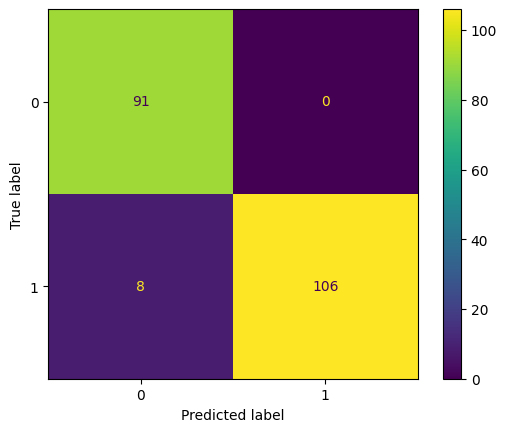

In [69]:
cm = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [70]:
from sklearn.metrics import precision_recall_curve

precision,recall,thresholds = precision_recall_curve(y_test,y_pred_proba[:,1])


In [71]:
thresholds

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [72]:
precision

array([0.55609756, 0.9047619 , 1.        , 1.        , 1.        ])

In [73]:
recall

array([1.        , 1.        , 0.92982456, 0.75438596, 0.        ])

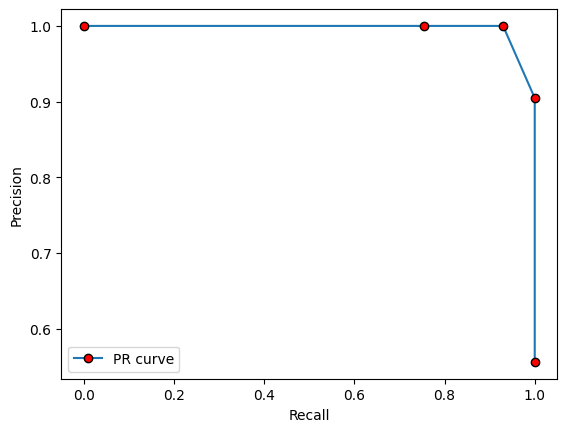

In [74]:
# plot the curve
from sklearn.metrics import PrecisionRecallDisplay
plt.plot(recall,precision,label='PR curve',
         marker='o',mfc='red',mec='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [75]:
# calculate the f1 scores

f1 = 2 * (precision * recall) / (precision + recall)
f1

array([0.71473354, 0.95      , 0.96363636, 0.86      , 0.        ])

In [76]:
# select the threshold value with max f1 score
idx_max = np.argmax(f1)

# select the threshold
threshold_optimum = thresholds[idx_max]
threshold_optimum

0.6666666666666666

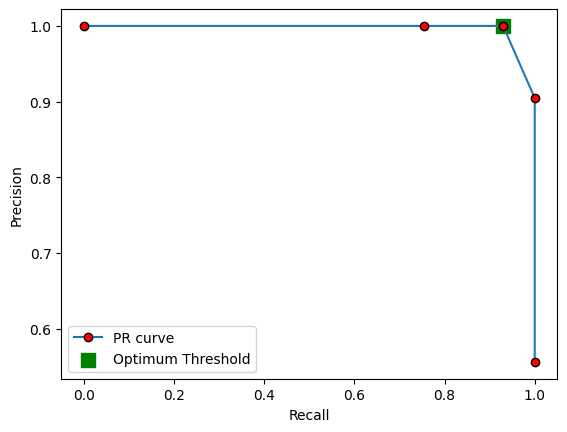

In [77]:
# plot the max threshold
# plot the curve

plt.plot(recall,precision,label='PR curve',
         marker='o',mfc='red',mec='k')
plt.scatter(recall[idx_max],precision[idx_max],label='Optimum Threshold',c='green',marker='s',s=100)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [78]:
# generate the confusion matrix for knn model

# fit the knn model

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_trans,y_train)

# predict the X_test
y_pred_proba = knn.predict_proba(X_test_trans) 
y_pred_proba = y_pred_proba[:,1]

y_pred = np.where(y_pred_proba >= threshold_optimum,1,0)
y_pred

# calculate the accuracy score
score = accuracy_score(y_test,y_pred)
print('The accuracy score is ',score)


The accuracy score is  0.9609756097560975


In [79]:
# generate a classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        91
           1       1.00      0.93      0.96       114

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



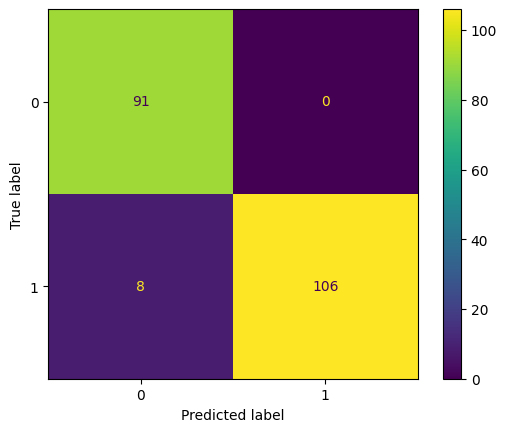

In [80]:
cm = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

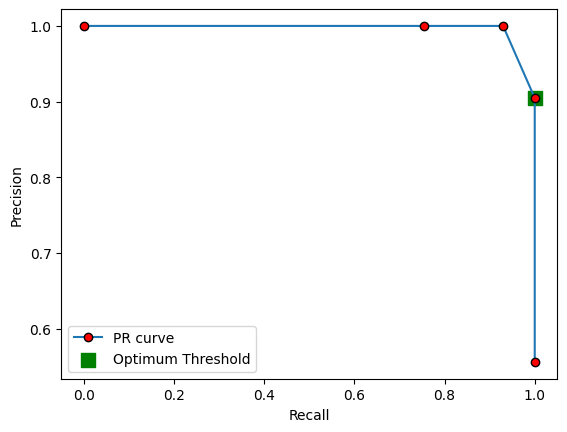

In [81]:
# choose the recall values as max
threshold_recall_max = thresholds[1]
idx_max = 1
# plot the max threshold
# plot the curve

plt.plot(recall,precision,label='PR curve',
         marker='o',mfc='red',mec='k')
plt.scatter(recall[idx_max],precision[idx_max],label='Optimum Threshold',c='green',marker='s',s=100)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [82]:
y_pred = np.where(y_pred_proba >= threshold_recall_max,1,0)
y_pred

# calculate the accuracy score
score = accuracy_score(y_test,y_pred)
print('The accuracy score is ',score)


The accuracy score is  0.9414634146341463


In [83]:
# generate a classification report where recall is max

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        91
           1       0.90      1.00      0.95       114

    accuracy                           0.94       205
   macro avg       0.95      0.93      0.94       205
weighted avg       0.95      0.94      0.94       205



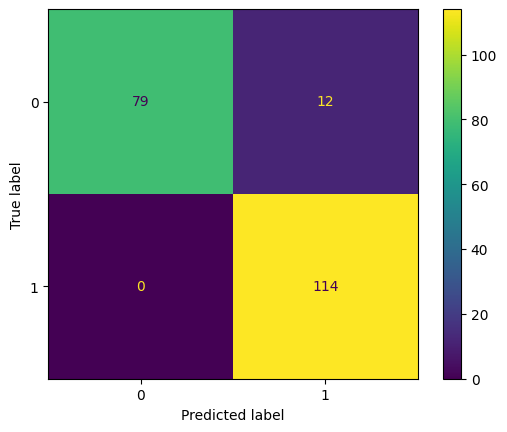

In [84]:
cm = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

- In this scenario we increased the number of False Positives but the model was able to bring down the number of False negatives to zero.

### ROC AUC curve

<div style="background-color:#F0B27A ; padding: 20px;">

<span style="font-size: 18px;">

The ROC AUC (Receiver Operating Characteristic Area Under the Curve) is a metric used to summarize the performance of a binary classification model. It represents the area under the ROC curve, which is a graphical plot of the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds.

The ROC curve is typically a plot of TPR (y-axis) against FPR (x-axis). Each point on the curve represents a different classification threshold, and the curve itself represents the trade-off between TPR and FPR. The ideal scenario is when the model achieves a high TPR while maintaining a low FPR.

The ROC AUC provides a single scalar value that measures the overall ability of a classifier to discriminate between positive and negative classes. It ranges from 0 to 1, where 0 indicates a poor classifier and 1 indicates a perfect classifier.
 

The ROC AUC is used in classification scenarios for several reasons:

1. Performance Evaluation: The ROC AUC provides a comprehensive evaluation of a classifier's performance across different classification thresholds. It considers the entire range of possible threshold values and summarizes the model's ability to distinguish between positive and negative instances.

2. Model Comparison: The ROC AUC allows for the comparison of different classification models. By comparing the AUC values of multiple models, you can determine which one has better discriminative power and performs better at classifying instances.

3. Threshold Selection: The ROC curve and AUC help in selecting an appropriate classification threshold based on the desired trade-off between TPR and FPR. Depending on the specific problem, you may want to prioritize sensitivity (high TPR) over specificity (low FPR) or vice versa. The ROC curve allows you to visually assess this trade-off and choose a threshold that aligns with your requirements.


</span>
</div>

<div style="background-color:#F0B27A ; padding: 20px;">

<span style="font-size: 18px;">

**TPR = TP / (TP + FN)**

**FPR = FP / (FP + TN)**

FPR stands for False Positive Rate. It is a metric that measures the proportion of negative instances that are incorrectly classified as positive by a binary classification model.

The FPR indicates the rate at which the model produces false positive predictions relative to the total number of actual negative instances. A low FPR indicates that the model is effectively distinguishing between positive and negative instances, while a high FPR suggests a higher rate of false positives.

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

In [86]:
# plot the ROC AUC curve using knn only

# fit the knn model
knn.fit(X_train_trans,y_train)

# generate predictions
y_pred = knn.predict(X_test_trans)
y_pred_proba = knn.predict_proba(X_test_trans)
y_pred_proba = y_pred_proba[:,1]

In [87]:
# calculate the roc values
from sklearn.metrics import roc_auc_score,roc_curve

fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

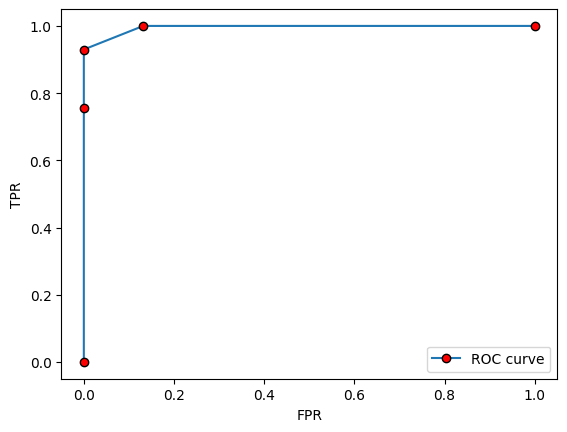

In [88]:
# plot the graph
plt.plot(fpr,tpr,label='ROC curve',
         marker='o',mfc='red',mec='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [89]:
# select the optimum threshold value

val = tpr-fpr
val

array([0.        , 0.75438596, 0.92982456, 0.86813187, 0.        ])

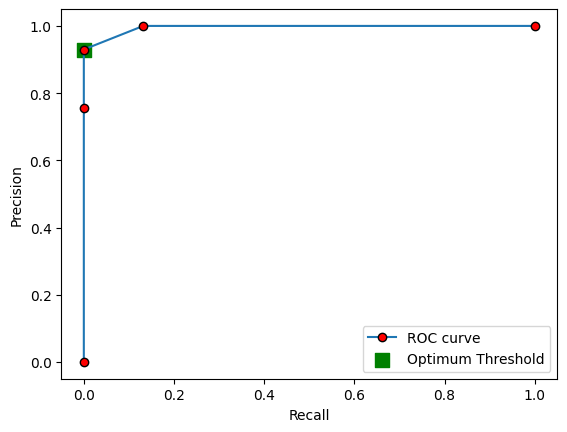

In [90]:
# select the max index position
idx_max = np.argmax(val)

plt.plot(fpr,tpr,label='ROC curve',
         marker='o',mfc='red',mec='k')
plt.scatter(fpr[idx_max],tpr[idx_max],label='Optimum Threshold',c='green',marker='s',s=100)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [91]:
# calculate the auc score
auc = roc_auc_score(y_test,y_pred_proba)
auc

0.995373048004627

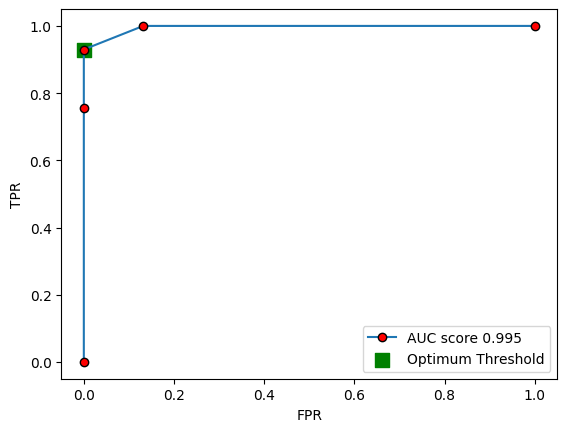

In [92]:
# select the max index position
idx_max = np.argmax(val)

plt.plot(fpr,tpr,label=f'AUC score {auc:.3f}',
         marker='o',mfc='red',mec='k')
plt.scatter(fpr[idx_max],tpr[idx_max],label='Optimum Threshold',c='green',marker='s',s=100)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

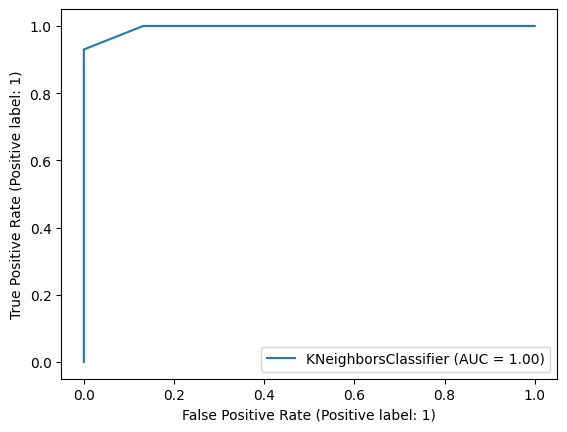

In [93]:
# plot the graph using sklearn
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(knn,X_test_trans,y_test)
plt.show()

In [94]:
# fit the knn model
knn.fit(X_train_trans,y_train)

# generate predictions
y_pred_proba_knn = knn.predict_proba(X_test_trans)
y_pred_proba_knn = y_pred_proba_knn[:,1]

In [95]:
# fit the decision tree model
dt.fit(X_train_trans,y_train)

# generate predictions
y_pred_proba_dt = dt.predict_proba(X_test_trans)
y_pred_proba_dt = y_pred_proba_dt[:,1]

In [96]:
# fit the logistic regression model
log_reg.fit(X_train_trans,y_train)

# generate predictions
y_pred_proba_log_reg = log_reg.predict_proba(X_test_trans)
y_pred_proba_log_reg = y_pred_proba_log_reg[:,1]

In [97]:
# calculate the roc curve values

fpr_knn,tpr_knn,_ = roc_curve(y_test,y_pred_proba_knn)
fpr_dt,tpr_dt,_ = roc_curve(y_test,y_pred_proba_dt)
fpr_log_reg,tpr_log_reg,_ = roc_curve(y_test,y_pred_proba_log_reg)

In [98]:
# calculate the ROC AUC scores for all the models  

auc_knn = roc_auc_score(y_test,y_pred_proba_knn)
auc_dt = roc_auc_score(y_test,y_pred_proba_dt)
auc_log_reg = roc_auc_score(y_test,y_pred_proba_log_reg)



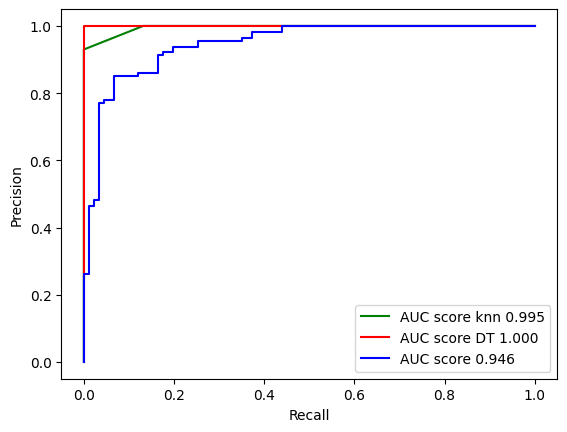

In [99]:
# plot the roc auc graph for knn
plt.plot(fpr_knn,tpr_knn,label=f'AUC score knn {auc_knn:.3f}',color='green')

# plot the roc auc graph for decision trees
plt.plot(fpr_dt,tpr_dt,label=f'AUC score DT {auc_dt:.3f}',color='red')

# plot the roc auc graph for logistic regression
plt.plot(fpr_log_reg,tpr_log_reg,label=f'AUC score {auc_log_reg:.3f}',color='blue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()